In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file=r"C:\Users\Pawan\Desktop\New folder\Computer Vision\Object recognition\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model=r"C:\Users\Pawan\Desktop\New folder\Computer Vision\Object recognition\frozen_inference_graph.pb"

In [4]:
model= cv2.dnn_DetectionModel(frozen_model,config_file)



In [5]:
classLabels=[]
file_name=r"C:\Users\Pawan\Desktop\New folder\Computer Vision\Object recognition\labels.txt"
with open(file_name,'rt')as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')
    

In [6]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 00000260EA078470>

In [9]:
img= cv2.imread(r"C:\Users\Pawan\Desktop\New folder\Computer Vision\Object recognition\img.jfif")

In [10]:
img

array([[[220, 210, 210],
        [220, 210, 210],
        [220, 210, 210],
        ...,
        [153, 141, 129],
        [153, 141, 129],
        [153, 141, 129]],

       [[219, 209, 209],
        [219, 209, 209],
        [219, 209, 209],
        ...,
        [158, 146, 134],
        [158, 146, 134],
        [158, 146, 134]],

       [[217, 207, 207],
        [217, 207, 207],
        [218, 208, 208],
        ...,
        [158, 146, 134],
        [158, 146, 134],
        [158, 146, 134]],

       ...,

       [[151, 143, 136],
        [151, 143, 136],
        [152, 144, 137],
        ...,
        [ 10,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       [[123, 115, 108],
        [124, 116, 109],
        [127, 119, 112],
        ...,
        [ 10,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       [[153, 145, 138],
        [151, 143, 136],
        [146, 138, 131],
        ...,
        [ 10,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]]

In [11]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 00000260EA0788B0>

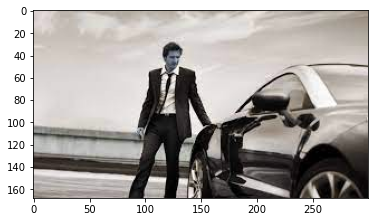

In [12]:
plt.imshow(img)

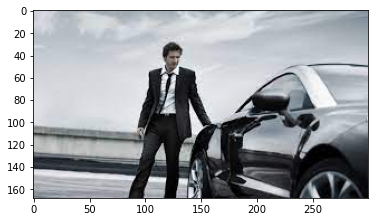

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
ClassIndex, confidence, bbox= model.detect(img,confThreshold=0.5)

In [15]:
print(ClassIndex)

[3 1]


In [16]:
font_scale=3
font= cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img, boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=1)

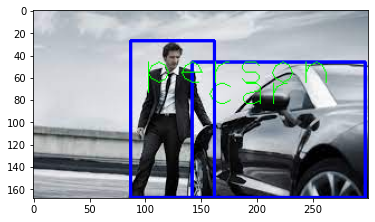

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [24]:
cap=cv2.VideoCapture(r"C:\Users\Pawan\Downloads\Video\GANGSTER CARS BEST ATTITUDE 💪#lover #status #shortvideo.mp4")
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raiseIOError('Cannot open video')
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=1)
    cv2.imshow('object detection tutorial',frame)
    
    if cv2.waitkey(2)& 0XFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[3 3 3]


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1268: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
